In [1]:
import os
os.chdir('/home/ubuntu/Thesis-KNMI-FoggyGAN/')

A_fnames = [fname for fname in os.listdir('data/raw/trainA3') if fname.endswith('jpg')]
B_fnames = [fname for fname in os.listdir('data/raw/trainB3') if fname.endswith('jpg')]

A_datadir = 'data/raw/trainA3'
B_datadir = 'data/raw/trainB3'

In [88]:
from matplotlib import pyplot as plt

A_images = []
for fname in A_fnames:
    fpath = os.path.join(A_datadir, fname)
    img = plt.imread(fpath)
    A_images.append(img)
    
B_images = []
for fname in B_fnames:
    fpath = os.path.join(B_datadir, fname)
    img = plt.imread(fpath)
    B_images.append(img)

In [89]:
from skimage.color import rgb2gray

A_images_gray = [rgb2gray(image) for image in A_images]
B_images_gray = [rgb2gray(image) for image in B_images]

In [90]:
from skimage.measure import shannon_entropy
import numpy as np

A_entropy_gray = np.array([shannon_entropy(image) for image in A_images_gray])
B_entropy_gray = np.array([shannon_entropy(image) for image in B_images_gray])

A_entropy_gray.mean(), B_entropy_gray.mean()

(13.055816882747342, 11.182410029847171)

In [91]:
from scipy.stats import ttest_ind

ttest_ind(A_entropy_gray, B_entropy_gray)

Ttest_indResult(statistic=38.15028754139103, pvalue=9.764686470846979e-272)

In [92]:
A_entropy_gray.std(), B_entropy_gray.std()

(1.5146573025362458, 1.5846692659949715)

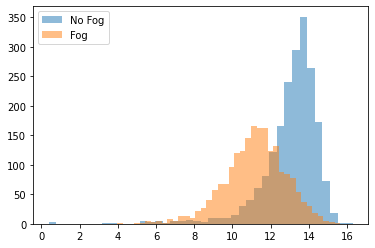

In [93]:
plt.hist(A_entropy_gray, bins=40, alpha=0.5, label='No Fog')
plt.hist(B_entropy_gray, bins=40, alpha=0.5, label='Fog')
plt.legend(loc='upper left')
plt.show()